In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
df = pd.read_csv("C:/Users/strike million/Downloads/SetofValues.csv")
print("\033[1;3mOriginal shape:\033[0m\n", df.shape)
print("\033[1;3mTotal Number of Null Values:\033[0m\n",df.isnull().sum())

Original shape:
 (150, 3)
Total Number of Null Values:
 Coffee (cups/day)          7
Sleep (hours/night)        7
Screen Time (hours/day)    7
dtype: int64


In [5]:
df_cleaned = df.dropna(subset=["Coffee (cups/day)","Sleep (hours/night)"])
print("\033[1;3mAfter Removing Null Values:\033[0m\n", df_cleaned.shape)

After Removing Null Values:
 (136, 3)


In [7]:
coffee = pd.to_numeric(df_cleaned["Coffee (cups/day)"], errors='coerce').to_numpy()
sleep = pd.to_numeric(df_cleaned["Sleep (hours/night)"], errors='coerce').to_numpy()
corr, p_value = pearsonr(coffee, sleep)

In [9]:
print ("\033[1;3mCorrelation:\033[0m\n",corr)
print ("\033[1;3mP_value:\033[0m\n", p_value)
print("\033[1;3mMean coffee consumption:\033[0m\n", np.mean(coffee))                    
print("\033[1;3mStd dev of sleep:\033[0m\n", np.std(sleep))                             
print("\033[1;3mMax coffee value:\033[0m\n", np.max(coffee))                             
print("\033[1;3mMin sleep value:\033[0m\n", np.min(sleep))                               
print("\033[1;3mSum of interaction (coffee * sleep):\033[0m\n", np.sum(coffee * sleep))

Correlation:
 -0.5737767048373759
P_value:
 2.840741688622837e-13
Mean coffee consumption:
 2.4348529411764703
Std dev of sleep:
 0.774355966355111
Max coffee value:
 4.69
Min sleep value:
 3.85
Sum of interaction (coffee * sleep):
 2012.9472999999998


In [11]:
X = sm.add_constant(coffee)  
model = sm.OLS(sleep, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     65.77
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.84e-13
Time:                        18:15:59   Log-Likelihood:                -131.04
No. Observations:                 136   AIC:                             266.1
Df Residuals:                     134   BIC:                             271.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4385      0.157     47.336      0.0

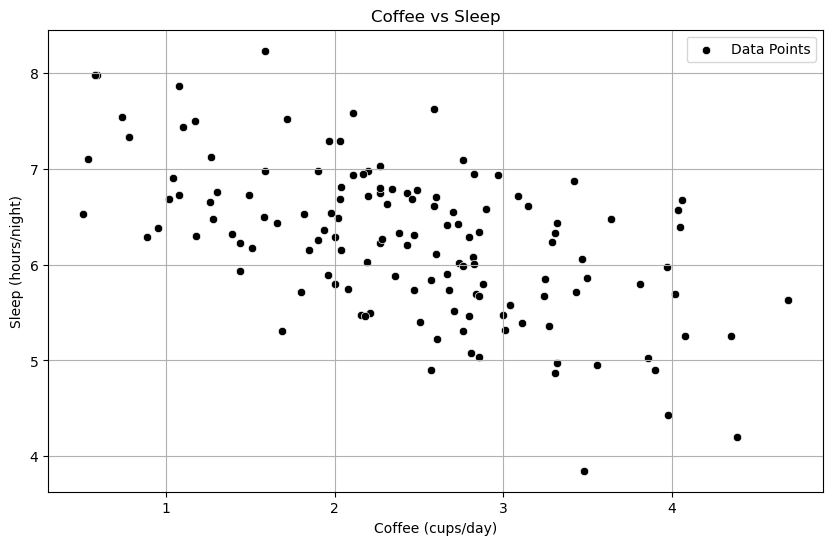

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coffee, y=sleep, color='black', label='Data Points')
plt.title("Coffee vs Sleep")
plt.xlabel("Coffee (cups/day)")
plt.ylabel("Sleep (hours/night)")
plt.grid(True)
plt.show()

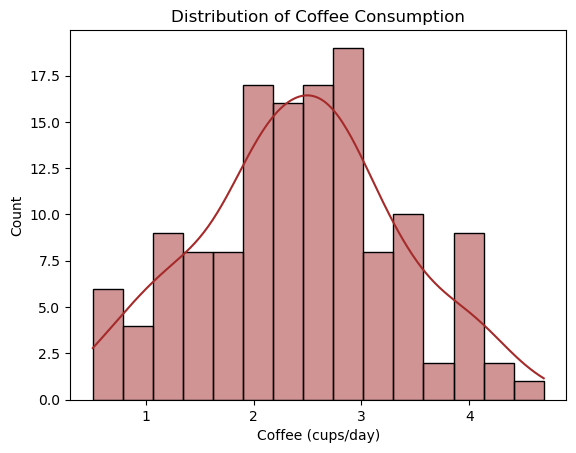

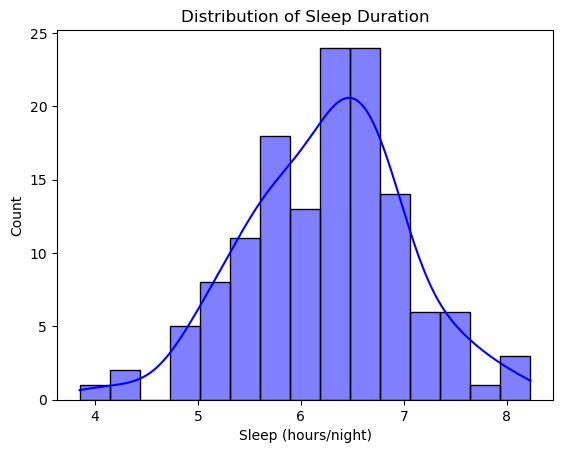

In [15]:
sns.histplot(coffee, kde=True, bins=15, color='brown')
plt.title("Distribution of Coffee Consumption")
plt.xlabel("Coffee (cups/day)")
plt.show()

sns.histplot(sleep, kde=True, bins=15, color='blue')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep (hours/night)")
plt.show()

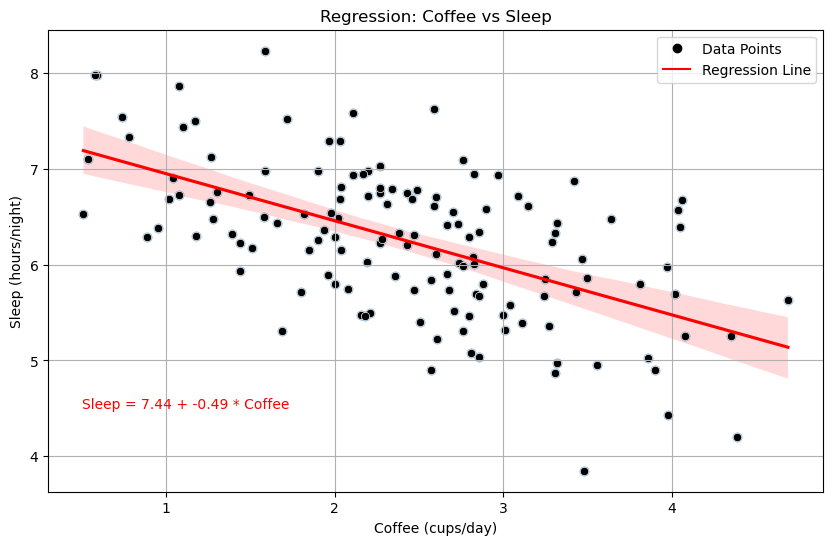

In [17]:
intercept = model.params[0]
slope = model.params[1]

plt.figure(figsize=(10, 6))
sns.regplot(x=coffee, y=sleep, line_kws={'color': 'red'})
sns.scatterplot(x=coffee, y=sleep, color='black')

plt.text(x=0.5, y=4.5 , s=f"Sleep = {intercept:.2f} + {slope:.2f} * Coffee", color='red', fontsize=10)
plt.title("Regression: Coffee vs Sleep")
plt.xlabel("Coffee (cups/day)")
plt.ylabel("Sleep (hours/night)")
plt.grid(True)


custom_lines = [
    Line2D([0], [0], color='black', marker='o', linestyle='', label='Data Points'),
    Line2D([0], [0], color='red', linestyle='-', label='Regression Line')
]
plt.legend(handles=custom_lines)
plt.show()

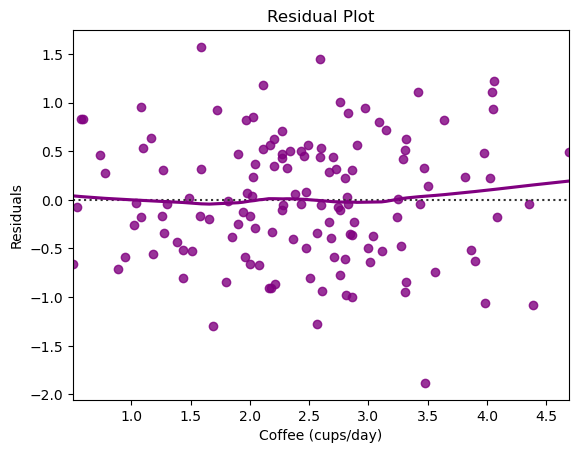

In [19]:
sns.residplot(x=coffee, y=sleep, lowess=True, color="purple")
plt.title("Residual Plot")
plt.xlabel("Coffee (cups/day)")
plt.ylabel("Residuals")
plt.show()

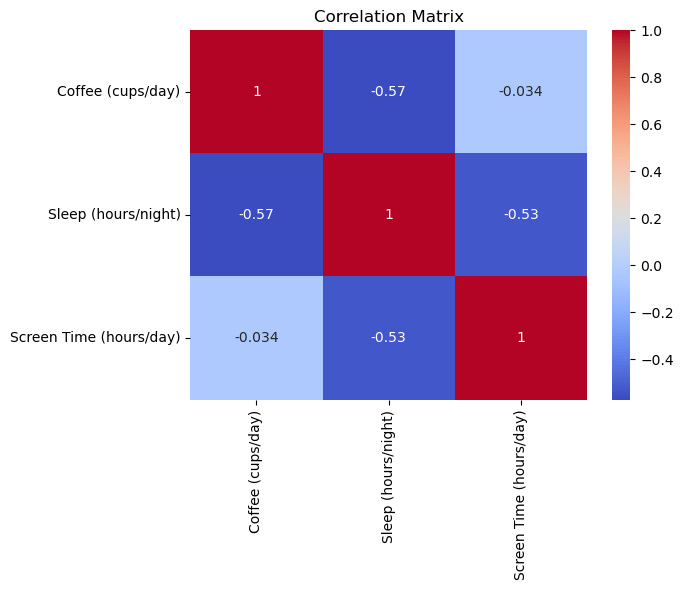

In [21]:
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()